# **Data Preprocessing**

**Data Preprocessing** is a vital step in the machine learning pipeline. Just as visualization is necessary to understand the relationships in data, proper preparation or **data munging** is required to ensure machine learning models work optimally. 

The process of data preparation is highly interactive and iterative. A typical process includes at least the following steps:
1. **Visualization** of the dataset to understand the relationships and identify possible problems with the data.
2. **Data cleaning and transformation** to address the problems identified. It many cases, step 1 is then repeated to verify that the cleaning and transformation had the desired effect. 
3. **Construction and evaluation of a machine learning models**. Visualization of the results will often lead to understanding of further data preparation that is required; going back to step 1. 

In this lab we will learn the following: 
 + Recode character strings to eliminate characters that will not be processed correctly.
 + Find and treat missing values. 
 + Set correct data type of each column. 
 + Transform categorical features to create categories with more cases and coding likely to be useful in predicting the label. 
 + Apply transformations to numeric features and the label to improve the distribution properties. 
 + Locate and treat duplicate cases. 

We will work on Housing Price datasets for this lab.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Importing the libraries
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# Setting the path
os.chdir("/content/gdrive/My Drive/Introduction to Data Science - Python edition/Module 2")

In [ ]:
# Importing the data
data = pd.read_csv("./House Price_train.csv")

In [ ]:
# Top 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Variable structure
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## **Recode names**

In [ ]:
data.columns = [str.replace('-', '_') for str in data.columns]

## **Transform column data type**

In [ ]:
num_to_cat = {"MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"}

for column in num_to_cat:
  data[column] = data[column].astype('object')

data[num_to_cat].dtypes

MSSubClass      object
MoSold          object
YearBuilt       object
GarageYrBlt     object
YearRemodAdd    object
YrSold          object
dtype: object

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Treat missing values**

In [ ]:
(data.astype(np.object) == '?').any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [ ]:
#data = data.replace(['nan', 'NA'],np.nan)
data.isnull().sum()/len(data)*100

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage     17.74
LotArea          0.00
Street           0.00
Alley           93.77
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

In [ ]:
print("Number of rows and columns in data before dropping :", data.shape)
data = data.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], axis = 1)
print("Number of rows and columns in data after dropping :", data.shape)

Number of rows and columns in data before dropping : (1460, 81)
Number of rows and columns in data after dropping : (1460, 76)


## **Aggregating categorical variables**

When a dataset contains categorical variables these need to be investigated to ensure that each category has sufficient samples. It is commonly the case that some categories may have very few samples, or have so many similar categories as to be meaningless.

RL        0.79
RM        0.15
FV        0.04
RH        0.01
C (all)   0.01
Name: MSZoning, dtype: float64


,MSZoning,count,mean,std,min,25%,50%,75%,max
0,C (all),10.00,74528.00,33791.09,34900.00,43998.25,74700.00,98332.00,133900.00
1,FV,65.00,214014.06,52369.66,144152.00,174000.00,205950.00,250000.00,370878.00
2,RH,16.00,131558.38,35714.12,76000.00,106150.00,136500.00,148608.50,200000.00
3,RL,1151.00,191004.99,80766.34,39300.00,137700.00,174000.00,224700.00,755000.00
4,RM,218.00,126316.83,48521.69,37900.00,100000.00,120500.00,140000.00,475000.00


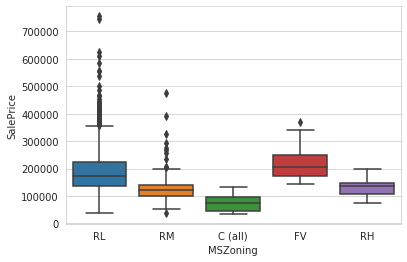

In [ ]:
# Checking MSZoning distribution
print(data['MSZoning'].value_counts(normalize = True))

display(data.groupby('MSZoning')['SalePrice'].describe().reset_index())

def plot_box(data, col, col_y = 'SalePrice'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=data)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box(data, 'MSZoning')

RL   0.79
RM   0.17
FV   0.04
Name: MSZoning, dtype: float64


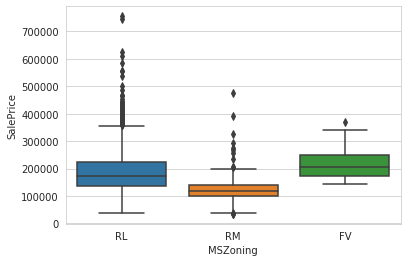

In [ ]:
# Transforming MSZoning
MSZoning = {'C (all)':'RM', 'RH':'RM', 'FV': 'FV', 'RL': 'RL', 'RM':'RM'}
data['MSZoning'] = [MSZoning[x] for x in data['MSZoning']]

# Checking MSZoning distribution
print(data['MSZoning'].value_counts(normalize = True))

plot_box(data, 'MSZoning')

## **Transforming numeric variables**

To improve performance of machine learning models transformations of the values are often applied. Typically, transformations are used to make the relationships between variables more linear. In other cases, transformations are performed to make distributions closer to Normal, or at least more symmetric. These transformations can include taking logarithms, exponential transformations and power transformations

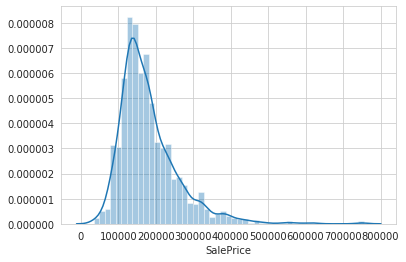

In [ ]:
sns.distplot(data['SalePrice']);

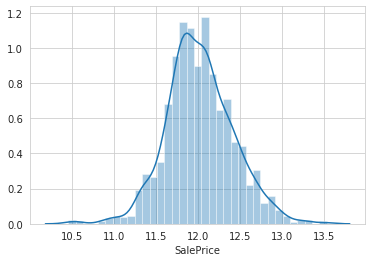

In [ ]:
sns.distplot(np.log(data['SalePrice']));

In [ ]:
# Changing distribution of SalePrice
data['SalePrice'] = np.log(data['SalePrice'])

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.25
1,2,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.11
2,3,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.32
3,4,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.85
4,5,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.43


# **Pre steps for Machine learning**

In order to perform any machine learning task, there are some steps which need to perform beforehand. These steps are:

 + Creating X and y
 + Splitting data into train, validation and test
 + Transforming categorical variables
 + Feature scaling for numerical variables

## **Creating X and y**

In [ ]:
# Creating X and y
X = data.drop(['Id', 'SalePrice'], axis = 1)
y = data['SalePrice']

print("Shape of X :", X.shape)
print("Shape of y :", y.shape)

Shape of X : (1460, 74)
Shape of y : (1460,)


## **Splitting data into train, validation and test**

When performing any type of machine learning, good data preparation is required to ensure good model performance. Poor data preparation is often the source of poor machine learning model performance. 

The first step in preparing these data is to create **independently sampled** **training dataset** and **validation dataset**. In most cases, an independently sampled **test dataset** will also be used. In this case, no model improvement or comparison will be performed so this additional step is unnecessary. 

If the same data are used to train and test a machine learning model, there is a high likelihood that the model will simply be learning the training data. In technical terms one can say that there is **information leakage** between the training and test processes. In this case, the model may not **generalize** well. A model that generalizes well produces consistent results when presented with new cases, never before encountered. Conversely, a model with poor generalization might give unexpected results when presented with a new case. 

The random sub-samples of the data are created using a process called **Bernoulli sampling**. Bernoulli sampling accepts a sample into the data subset with probability $p$. In this case, the probability that a given case is in the training dataset is $p$. The probability a case is in the test dataset then becomes $1-p$. 

The `train_test_split` function from the `sklearn.model_selection` module performed the required Bernoulli sampling. The `train_test_split` function samples the index for the array containing the features and label values. 

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [ ]:
# Checking distribution of training, validation and test set

sample_type = ['train','validation','test']
sample_size = [len(X_train), len(X_validation), len(X_test)]

sample_size_df = pd.DataFrame()
sample_size_df['sample_type'] = sample_type
sample_size_df['total_sample'] = len(X)
sample_size_df['sample_size'] = sample_size
sample_size_df['sample_dist'] = sample_size_df['sample_size']/sample_size_df['total_sample']*100
sample_size_df

,sample_type,total_sample,sample_size,sample_dist
0,train,1460,1022,70.00
1,validation,1460,219,15.00
2,test,1460,219,15.00


## **Missing value imputation**

In [ ]:
def num_to_cat(X_train):
  X_train['MSSubClass'] = X_train['MSSubClass'].astype('object')
  X_train['YearBuilt'] = X_train['YearBuilt'].astype('object')
  X_train['YearRemodAdd'] = X_train['YearRemodAdd'].astype('object')
  X_train['GarageYrBlt'] = X_train['GarageYrBlt'].astype('object')
  X_train['MoSold'] = X_train['MoSold'].astype('object')
  X_train['YrSold'] = X_train['YrSold'].astype('object')
  return X_train

X_train = num_to_cat(X_train)
X_validation = num_to_cat(X_validation)
X_test = num_to_cat(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
X_train.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt         object
YearRemodAdd      object
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


### **Categorical variables**

In [ ]:
# Missing value imputation for categorical variables

# list of categorical variables
cat_var = X_train.select_dtypes(include = ['object']).columns.tolist()
print(cat_var)

print("Missing values in X_train :", X_train[cat_var].isnull().sum().sum())
print("Missing values in X_validation :", X_validation[cat_var].isnull().sum().sum())
print("Missing values in X_test :", X_test[cat_var].isnull().sum().sum())
print(" ")

X_train[cat_var] = X_train[cat_var].fillna('Unknown')
X_validation[cat_var] = X_validation[cat_var].fillna('Unknown')
X_test[cat_var] = X_test[cat_var].fillna('Unknown')

print("Missing values in X_train :", X_train[cat_var].isnull().sum().sum())
print("Missing values in X_train :", X_validation[cat_var].isnull().sum().sum())
print("Missing values in X_train :", X_test[cat_var].isnull().sum().sum())

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Missing values in X_train : 397
Missing values in X_validation : 98
Missing values in X_test : 106
 
Missing values in X_train : 0
Missing values in X_train : 0
Missing values in X_train : 0


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### **Numerical variables**

In [ ]:
# Missing value imputation for categorical variables

# list of categorical variables
num_var = X_train.select_dtypes(include = ['int', 'float']).columns.tolist()
print(num_var)

print("Missing values in X_train :", X_train[num_var].isnull().sum().sum())
print("Missing values in X_train :", X_validation[num_var].isnull().sum().sum())
print("Missing values in X_train :", X_test[num_var].isnull().sum().sum())
print(" ")

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imputer = imputer.fit(X_train[num_var])
X_train[num_var] = imputer.transform(X_train[num_var])
X_validation[num_var] = imputer.transform(X_validation[num_var])
X_test[num_var] = imputer.transform(X_test[num_var])

print("Missing values in X_train :", X_train[num_var].isnull().sum().sum())
print("Missing values in X_train :", X_validation[num_var].isnull().sum().sum())
print("Missing values in X_train :", X_test[num_var].isnull().sum().sum())

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Missing values in X_train : 194
Missing values in X_train : 39
Missing values in X_train : 34
 
Missing values in X_train : 0
Missing values in X_train : 0
Missing values in X_train : 0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

## **Transforming categorical variables**

In [ ]:
# Encoding categorical data
temp = pd.get_dummies(X_train[cat_var])
X_train = X_train.drop(cat_var, axis = 1)
X_train = pd.concat([X_train, temp], axis = 1)
X_train.head()

NameError: ignored

In [ ]:
# Encoding categorical data
temp = pd.get_dummies(X_validation[cat_var])
X_validation = X_validation.drop(cat_var, axis = 1)
X_validation = pd.concat([X_validation, temp], axis = 1)
X_validation.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,YearBuilt,YearRemodAdd,MoSold,YrSold,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,...,GarageYrBlt_1985.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageQual_Unknown,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_TA,GarageCond_Unknown,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1248,60.00,9600.00,6.00,5.00,0.00,319.00,0.00,416.00,735.00,1134.00,924.00,0.00,2058.00,0.00,0.00,1.00,1.00,3.00,1.00,8.00,1.00,2.00,396.00,0.00,0.00,259.00,0.00,0.00,0.00,0.00,75.00,1917.00,1950.00,4.00,2008.00,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
75,21.00,1596.00,4.00,5.00,0.00,462.00,0.00,0.00,462.00,526.00,462.00,0.00,988.00,1.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1.00,297.00,120.00,101.00,0.00,0.00,0.00,0.00,0.00,180.00,1973.00,1973.00,11.00,2009.00,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
486,79.00,10289.00,5.00,7.00,168.00,836.00,0.00,237.00,1073.00,1073.00,0.00,0.00,1073.00,1.00,0.00,1.00,1.00,3.00,1.00,6.00,0.00,2.00,515.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1965.00,1965.00,6.00,2007.00,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1390,70.00,9100.00,7.00,5.00,244.00,1400.00,0.00,125.00,1525.00,1525.00,0.00,0.00,1525.00,1.00,0.00,2.00,0.00,3.00,1.00,6.00,0.00,2.00,541.00,219.00,36.00,0.00,0.00,0.00,0.00,0.00,20.00,2000.00,2000.00,9.00,2006.00,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
776,86.00,11210.00,7.00,5.00,240.00,20.00,0.00,1594.00,1614.00,1614.00,0.00,0.00,1614.00,0.00,0.00,2.00,0.00,3.00,1.00,7.00,0.00,3.00,865.00,144.00,59.00,0.00,0.00,0.00,0.00,0.00,20.00,2005.00,2006.00,7.00,2006.00,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
# Encoding categorical data
temp = pd.get_dummies(X_test[cat_var])
X_test = X_test.drop(cat_var, axis = 1)
X_test = pd.concat([X_test, temp], axis = 1)
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,YearBuilt,YearRemodAdd,MoSold,YrSold,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,...,GarageYrBlt_1989.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageQual_Unknown,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1318,69.00,14781.00,8.00,5.00,178.00,0.00,0.00,1753.00,1753.00,1787.00,0.00,0.00,1787.00,0.00,0.00,2.00,0.00,3.00,1.00,7.00,1.00,3.00,748.00,198.00,150.00,0.00,0.00,0.00,0.00,0.00,20.00,2001.00,2002.00,8.00,2006.00,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
494,50.00,5784.00,5.00,8.00,0.00,0.00,0.00,190.00,190.00,886.00,0.00,0.00,886.00,0.00,0.00,1.00,0.00,2.00,1.00,4.00,0.00,1.00,273.00,144.00,20.00,80.00,0.00,0.00,0.00,0.00,30.00,1938.00,1996.00,12.00,2009.00,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
192,68.00,9017.00,7.00,5.00,0.00,560.00,0.00,871.00,1431.00,1431.00,0.00,0.00,1431.00,1.00,0.00,2.00,0.00,3.00,1.00,6.00,0.00,2.00,666.00,0.00,35.00,0.00,0.00,0.00,0.00,0.00,20.00,1999.00,1999.00,9.00,2009.00,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
465,69.00,3072.00,7.00,5.00,18.00,0.00,0.00,1375.00,1375.00,1414.00,0.00,0.00,1414.00,0.00,0.00,2.00,0.00,2.00,1.00,6.00,1.00,2.00,398.00,144.00,20.00,0.00,0.00,0.00,0.00,0.00,120.00,2004.00,2004.00,5.00,2006.00,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
426,69.00,12800.00,7.00,5.00,145.00,1518.00,0.00,0.00,1518.00,1644.00,0.00,0.00,1644.00,1.00,1.00,2.00,0.00,2.00,1.00,5.00,1.00,2.00,569.00,80.00,0.00,0.00,0.00,396.00,0.00,0.00,80.00,1989.00,1989.00,8.00,2009.00,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## **Feature scaling : numeric variables**

Now that the dataset is split, the numeric feature column must be re-scaled. Rescaling of numeric features is extremely important. The numeric range of a feature should not determine how much that feature determines the training of the machine learning model. 

For example, consider a data set with two features, age in years, typically measured in a few tens, and income, typically measured in tens or hundreds of thousands. There is no reason to believe that income is more important than age in some model, simply because its range of values is greater. To prevent this problem numeric features are scaled to the same range. 

There are many possible scaling method which are:
 + Standard Scaler
 + MinMax Scaler
 + Robust Scaler
 + Normalizer

**Standard Scaler**

The Standard Scaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

$$x\_scaled_i = \frac{\big(x_i - \mu \big)}{\sigma}$$

where,
 + $\mu $ is the mean of the variable $X$,
 + $\sigma $ is the standard deviation of the variable $X$.

If data is not normally distributed, this is not the best scaler to use.

**MinMax Scaler**

Another method is known as **Min-Max** normalization. The data are scaled using the following formula to be in the range $\{ 0,1 \}$:

$$x\_scaled_i = \frac{(x_i - Min(x))}{(Max(x) - Min(x))}$$

where,
$x_i $ is the ith sample value,
$Min(X) $ is the minimum value of all samples,
$Max(X) $ is the maximum value of all samples.

In general, Min-Max normalization is a good choice for cases where the value being scaled has a complex distribution. For example, a variable with a distribution with multiple modes might be a good candidate for Min-Max normalization. Notice that the presence of a few outliers can distort the result by giving unrepresentative values of $Min(X)$ or $Max(X)$.

The code in the cell below uses the `StandardScaler` function from the `sklearn.preprocessing` package. This function computes the scaling coefficients for the training data. The resulting transformation is then applied to the training and test data using the transform method.

Notice that the scaling transform is computed only on the training data. The scaling transform should always be computed on the training data, not the test or evaluation data.

Generally, a numeric label does not need to be scaled. Other transformations may be required, however.

In [ ]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,YearBuilt,YearRemodAdd,MoSold,YrSold,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,...,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,69.00,9375.00,7.00,5.00,573.00,739.00,0.00,318.00,1057.00,1057.00,977.00,0.00,2034.00,1.00,0.00,2.00,1.00,3.00,1.00,8.00,0.00,2.00,645.00,576.00,36.00,0.00,0.00,0.00,0.00,0.00,60.00,1997.00,1998.00,2.00,2009.00,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
682,69.00,2887.00,6.00,5.00,0.00,1003.00,0.00,288.00,1291.00,1291.00,0.00,0.00,1291.00,1.00,0.00,1.00,0.00,2.00,1.00,6.00,1.00,2.00,431.00,307.00,0.00,0.00,0.00,0.00,0.00,0.00,120.00,1996.00,1997.00,11.00,2008.00,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
960,50.00,7207.00,5.00,7.00,0.00,696.00,0.00,162.00,858.00,858.00,0.00,0.00,858.00,1.00,0.00,1.00,0.00,2.00,1.00,4.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1958.00,2008.00,2.00,2010.00,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1384,60.00,9060.00,6.00,5.00,0.00,204.00,0.00,356.00,560.00,698.00,560.00,0.00,1258.00,0.00,0.00,1.00,0.00,2.00,1.00,6.00,0.00,1.00,280.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,1939.00,1950.00,10.00,2009.00,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1100,60.00,8400.00,2.00,5.00,0.00,290.00,0.00,0.00,290.00,438.00,0.00,0.00,438.00,0.00,0.00,1.00,0.00,1.00,1.00,3.00,0.00,1.00,246.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00,1920.00,1950.00,1.00,2009.00,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[num_var] = sc.fit_transform(X_train[num_var])
X_validation[num_var] = sc.transform(X_validation[num_var])
X_test[num_var] = sc.transform(X_test[num_var])

In [ ]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass,YearBuilt,YearRemodAdd,MoSold,YrSold,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,...,GarageYrBlt_1989.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_Unknown,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Fa,GarageQual_Gd,GarageQual_TA,GarageQual_Unknown,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1318,-0.07,0.79,1.27,-0.53,0.36,-0.75,-0.31,2.39,1.22,1.38,-0.76,-0.10,0.48,-0.84,-0.22,0.81,-0.69,0.15,-0.25,0.29,0.57,1.58,1.20,1.01,1.62,-0.33,-0.16,-0.28,-0.14,-0.11,-0.85,0.97,0.83,0.61,-1.38,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
494,-0.77,-0.72,-0.81,2.32,-0.56,-0.75,-0.31,-0.84,-1.60,-0.63,-0.76,-0.10,-1.08,-0.84,-0.22,-0.88,-0.69,-1.03,-0.25,-1.52,-0.90,-0.94,-0.86,0.51,-0.35,1.23,-0.16,-0.28,-0.14,-0.11,-0.62,-1.15,0.55,2.16,0.99,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
192,-0.10,-0.17,0.58,-0.53,-0.56,0.23,-0.31,0.57,0.64,0.58,-0.76,-0.10,-0.14,1.04,-0.22,0.81,-0.69,0.15,-0.25,-0.32,-0.90,0.32,0.85,-0.83,-0.12,-0.33,-0.16,-0.28,-0.14,-0.11,-0.85,0.90,0.69,1.00,0.99,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
465,-0.07,-1.17,0.58,-0.53,-0.46,-0.75,-0.31,1.61,0.54,0.55,-0.76,-0.10,-0.17,-0.84,-0.22,0.81,-0.69,-1.03,-0.25,-0.32,0.57,0.32,-0.32,0.51,-0.35,-0.33,-0.16,-0.28,-0.14,-0.11,1.47,1.07,0.92,-0.55,-1.38,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
426,-0.07,0.46,0.58,-0.53,0.19,1.92,-0.31,-1.23,0.80,1.06,-0.76,-0.10,0.23,1.04,3.83,0.81,-0.69,-1.03,-0.25,-0.92,0.57,0.32,0.42,-0.08,-0.65,-0.33,-0.16,6.05,-0.14,-0.11,0.54,0.56,0.23,0.61,0.99,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
